<div id="container" style="position:relative;">
<div style="position:relative; float:left"><img style="height:140px, width:280px" src ="images/covid_cover.png" />
</div>
</div>

**Combating Covid-19 Misinformation Using Natural Language Processing. How can we create a NLP Classification Model to detect whether an article, post, and tweet is in fact “real” or “fake”?**

<font color='red'>**Please Note:**</font>
<br>

<font color='red'>**This is notebook 2 of 6**</font> - Each article and twitter dataset will have 3 notebooks each containing a 'Loading & Merging', 'Cleaning & EDA', and a 'Vectorizing and Modeling' notebook.

-------------------------------------------------------------------------------------------------------------------

# **Cleaning & EDA**

This section of my project will try to implement best practices for cleaning data and detail key findings during the Exploratory Data Analysis process. Cleaning and Transforming the data will be the most crucial component in achieving sucess down the line during the EDA process and while training and testing Machine Learning and Deep Learning Models.


**Cleaning**

Cleaning data will be broken down into three main steps(metahphorically speaking):
- **Step 1** - Find the dirt
- **Step 2** - Scrub the dirt
- **Step 3** - Rinse & Repeat

Take a look at what type of features are within this dataset.

## **Data Dictionary**
<br>

- `type` (object) - Type of media consumption.
- `fact_check_url` (object) - Website reference for validity.
- `archive` (object) - Reference to archival record location.
- `news_url` (object) - Original domain origin of claim.
- `news_url2` (object) - Secondary domain origin of claim.
- `news_url3` (object) - Additonal domain origin of claim.
- `news_url4` (object) - Additonal domain origin of claim.
- `news_url5` (object) - Additonal domain origin of claim.
- `title` (object) - Title of article .
- `newstitle` (object) - Headline of article.
- `content` (object) - Subject matter of post or article.
- `abstract` (object) - Summarization of the subject matter.
- `publish_date` (object) - Date the article or post was published.
- `meta_keywords` (object) - Keywords that are exclusive to the data point.
- `label` (object) - Label refers to whether the claim within an article or post is true or false.


### URL Data
<br>

**Domain Names**
- There are a total of 198 unique domain names within this dataset. 
<br>

<center>TOP 10 DOMAINS</center>



|**Domain Name**   |**Count**       |    
|:------------------|:--------------| 
| www.cdc.gov            |         1031| 
| www.healthline.com            |      586      |   
| www.facebook.com        | 536     |
| www.medicalnewstoday.com            | 463  | 
| www.sciencedaily.com            | 347  |      
| www.who.int            |         158 | 
| www.twitter.com             |      90     |   
| www.nih.gov        | 74    |
| www.youtube.com            | 44  | 
| www.newsroom.cleavelandclinic.org            | 44 |


In [314]:
# Importing everything we need
# The usual packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To make our sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Scalars
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# The classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import itertools

# Scoring
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Word Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
stopwords = set(STOPWORDS)
from PIL import Image

# Cell Width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# Tokenize Libraries
# Importing libraries
#import nltk import re
#from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## **Data Check**

In [315]:
CoAID_df = pd.read_csv('data/CoAID_df.csv')
CoAID_df

,Unnamed: 0,type,fact_check_url,archive,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords,label
0,0,post,https://factcheck.afp.com/false-advice-refusin...,https://perma.cc/J4N6-39D5,https://www.facebook.com/photo.php?fbid=551960...,0,0,0,0,Facebook posts shared in at least three countr...,0,0,0,0,0,fake
1,1,article,https://www.politifact.com/factchecks/2020/apr...,0,http://legis.wisconsin.gov/assembly/republican...,0,0,0,0,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,0,0,"""""",fake
2,2,post,https://factcheck.afp.com/posts-claim-children...,https://perma.cc/V4HX-M2XJ,https://www.facebook.com/iAmJessenia/photos/a....,0,0,0,0,Facebook posts claim a child who is infected w...,0,0,0,0,0,fake
3,3,post,https://checkyourfact.com/2020/04/20/fact-chec...,0,https://www.facebook.com/kokernagnews/photos/a...,0,0,0,0,IndiaÕs Ministry of Home Affairs banning citiz...,0,0,0,0,0,fake
4,5,post,https://checkyourfact.com/2020/04/20/fact-chec...,0,https://www.facebook.com/photo.php?fbid=102193...,0,0,0,0,"42 Democratic senators, plus two Independents,...",0,0,0,0,0,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,10078,article,https://www.politifact.com/factchecks/2020/oct...,0,https://www.themonitor.com/2020/10/05/kamala-h...,0,0,0,0,Says the “The Rio Grande Valley is 4.7% of the...,"""403 Forbidden""",0,0,0,"""""",real
5453,10079,article,https://www.politifact.com/factchecks/2020/oct...,0,https://www.wral.com/cooper-forest-engage-in-l...,0,0,0,0,"Georgia has “almost 100,000 more (COVID-19) ca...","""Cooper, Forest engage in lone gubernatorial d...",governor dan forest. live debate at u. n c. t ...,democratic gov. roy cooper and republican lt. ...,2020-10-14T18:47:00-04:00,"""Roy Cooper,Dan Forest,2020 governors race,deb...",real
5454,10080,post,https://www.politifact.com/factchecks/2020/oct...,0,https://www.facebook.com/photo.php?fbid=402154...,0,0,0,0,“Wisconsin Republicans have not passed a singl...,"""Facebook""",0,0,0,"""""",real
5455,10081,post,https://www.politifact.com/factchecks/2020/sep...,0,https://twitter.com/SenChrisLarson/status/1308...,0,0,0,0,“(Republicans) have the power to overturn the ...,"""""",this browser is no longer supported. please sw...,0,0,"""""",real


In [316]:
CoAID_df.shape

(5457, 16)

In [317]:
CoAID_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5457 entries, 0 to 5456
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      5457 non-null   int64 
 1   type            5457 non-null   object
 2   fact_check_url  5457 non-null   object
 3   archive         5457 non-null   object
 4   news_url        5457 non-null   object
 5   news_url2       5457 non-null   object
 6   news_url3       5457 non-null   object
 7   news_url4       5457 non-null   object
 8   news_url5       5457 non-null   object
 9   title           5457 non-null   object
 10  newstitle       5457 non-null   object
 11  content         5457 non-null   object
 12  abstract        5457 non-null   object
 13  publish_date    5457 non-null   object
 14  meta_keywords   5457 non-null   object
 15  label           5457 non-null   object
dtypes: int64(1), object(15)
memory usage: 682.2+ KB


# **Data Cleaning & Text PreProcessing**

# Step 1. Diagnose Data for Cleaning: Find the Dirt
- **1**. Remove Duplicates
- **2.** Find any missing values
- **3.** How is the data distributed?
- **4.** Data consistency *(i.e. content with emojis, newstitles in different languages, etc.)*

Check the Data types that are contained within the dataframe

In [318]:
# Check the data types 
CoAID_df.dtypes

Unnamed: 0         int64
type              object
fact_check_url    object
archive           object
news_url          object
news_url2         object
news_url3         object
news_url4         object
news_url5         object
title             object
newstitle         object
content           object
abstract          object
publish_date      object
meta_keywords     object
label             object
dtype: object

There are some features that will need to be transformed to `int` types such as:
- `publish_date`
- `label`
<br>

If the features are relevant and necessary we may not need to change the data types.

## 1. Duplicate Values

First we will check for duplicate rows:

In [319]:
# check for duplicate rows
duplicate_indicator = CoAID_df.duplicated()

In [320]:
# these rows have duplicates in the data
CoAID_df.loc[duplicate_indicator, :]

,Unnamed: 0,type,fact_check_url,archive,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords,label


There are no duplicates within the DataFrame - We can move on to the next step

## 2. Missing Values

Next we will check the dataframe for completeness. We present the per-columns fraction of missing values below:
<br>

*note: since the zero values are `object` types, they will not appear as a null value. So in order to combat this, I will surround the 0 in quatations to account for the actual missing value.*

***

<font color='red'>**IMPROPER COUNT OF THE MISSING VALUES**</font>

Ok, I learned this the hard way. I ran code that checked to see if there are any `na` (missing) values which resulted in zero missing values. Sure there are no missing `na` values. **BUT**, those missing values can actually be represented by an `integer` ('0') not an `object` ('na') which will yield false results and screw up the rest of the process! 

So, lets take a look at what that may look like.

In [321]:
coaid_missing = CoAID_df.isna()
coaid_missing.head()

,Unnamed: 0,type,fact_check_url,archive,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords,label
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [322]:
#  Calculate the missing fraction using basic arithmatic
percent_missing = CoAID_df.isnull().sum() * 100 / len(CoAID_df)
missing_value_df = pd.DataFrame({'column_name': CoAID_df.columns,
                                 'percent_missing': percent_missing})

In [323]:
missing_value_df

,column_name,percent_missing
Unnamed: 0,Unnamed: 0,0.0
type,type,0.0
fact_check_url,fact_check_url,0.0
archive,archive,0.0
news_url,news_url,0.0
news_url2,news_url2,0.0
news_url3,news_url3,0.0
news_url4,news_url4,0.0
news_url5,news_url5,0.0
title,title,0.0


By running `isna` it seems that there are no missing values! Great! Let's Move On! 
<br>

False! there are pleny of missing values! Here is a different and more proper approach to the data within this dataset. Not all datasets are created equal...

***

<font color='green'>**PROPER COUNT OF THE MISSING VALUES**</font>

In [324]:
def highlight(s):
    if s.percent_missing > 25:
        return ['background-color: yellow']*1
    else:
        
        return ['background-color: white']*1

In [325]:
percent_missing_values = CoAID_df[CoAID_df == '0'].count(axis=0) * 100 / len(CoAID_df)
missing_values = pd.DataFrame({'percent_missing': percent_missing_values})

In [326]:
missing_values.style.apply(highlight, axis=1)

,percent_missing
Unnamed: 0,0.000000
type,0.787979
fact_check_url,0.000000
archive,93.091442
news_url,0.787979
news_url2,98.295767
news_url3,98.900495
news_url4,99.376947
news_url5,99.725124
title,0.000000


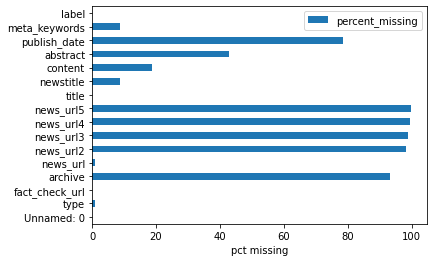

In [327]:
# plot the misssing values
missing_values.plot(kind="barh")# histogram
plt.xlabel("pct missing");# label missing categories

We see there is a good number of missing values within our current working dataframe. I will go ahead and analyze if these missing values will need to be handled or not.

### Drop the Features

Here I will drop features that I am confident will not provide useful information.
<br>
The features that will be dropped are:
- `news_url2` - Too many missing values
- `news_url3` - Too many missing values
- `news_url4` - Too many missing values
- `news_url5` - Too many missing values
- `archive` - Sole use is to provide validity of claim.
- `fact_check_url` - Fact checks do not provide any additional information for the NLP process.
- `abstract` - Most of what we will read within the abstract will only reflect the original post or article and will not provide any additional useful information which is not present within the original.
- `publish_date` - Too many dates are missing to properly run a time series analyses on this data.

In [328]:
CoAID_df = CoAID_df.drop(columns=['Unnamed: 0','news_url2','news_url3','news_url4','news_url5','archive','fact_check_url', 'abstract', 'publish_date'])

In [329]:
CoAID_df.head()

,type,news_url,title,newstitle,content,meta_keywords,label
0,post,https://www.facebook.com/photo.php?fbid=551960...,Facebook posts shared in at least three countr...,0,0,0,fake
1,article,http://legis.wisconsin.gov/assembly/republican...,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,"""""",fake
2,post,https://www.facebook.com/iAmJessenia/photos/a....,Facebook posts claim a child who is infected w...,0,0,0,fake
3,post,https://www.facebook.com/kokernagnews/photos/a...,IndiaÕs Ministry of Home Affairs banning citiz...,0,0,0,fake
4,post,https://www.facebook.com/photo.php?fbid=102193...,"42 Democratic senators, plus two Independents,...",0,0,0,fake


In [330]:
CoAID_df.shape

(5457, 7)

In [331]:
CoAID_df.columns

Index(['type', 'news_url', 'title', 'newstitle', 'content', 'meta_keywords',
       'label'],
      dtype='object')

## Remaining Useful Features

**In this section I will explain my reasoning behind my thought process into why the remaining features are valuable and the only useful features that will help us determine if a statement is in fact truth or lie.**

Features:
- `type` -
- `news_url` - 
- `title` - 
- `news_title` - 
- `content` - 
- `meta_keywords` - 

The categorical columns can now be selected by the `object` type:

In [332]:
# Set up a new variable 
categoric_columns = list(CoAID_df.select_dtypes("object").columns)

In [333]:
# Sanity Check
categoric_columns

['type', 'news_url', 'title', 'newstitle', 'content', 'meta_keywords', 'label']

# Step 2: Scrub the Dirt
<br>

**We will break step 2 down into six parts:**
<br>

Scrubbing the data can be (and should be) intensive. Below I will break down the data scrubbing process as best as I can. So be sure to follow along as closely as possible!

1. **Parse data** - get rid of unwanted information *(i.e. website url's to be trimmed down to their domain name)*

2. **Outliers** - Outliers can signify either very interesting behavior or a broken collection process.Both are valuable information so don't toss either out just yet! Every piece of data (useful or unuseful) counts!

3. **Contaminated Data** - There is not much you can do with corrupted data except to remove it (i.e. Purchse information in your customer address dataset). When lacking domain knowledge, consult non-analytical members of your team. Make sure to also fix any leakages your data collection pipeline has so that data corruption does not repeat with future data collection.

4. **Inconsistent Data** - 'Apples', 'apples', 'APPLES' is an example of what a case of inconsistent data can look like. Be sure to make changes to your data so that each product (in this case) is represented uniformly across the board. YOU HAVE TO EXPECT INCONSISTENCY IN YOUR DATA! Especially when there is a higher possibility of human error. (e.g. when salespeople enter the product info on proforma invoices manually).
The best way to spot inconsistent representations of the same elements in your database is to visualize them. When an inconsistency is spotted, standardize all elements into the same format. Lowercasing as default and correcting typos are your sword and shield here.

5. **Invalid Data** - Similar to corrupted data, invalid data is illogical. For example, users who spend -2 hours on an app, or a person whose age is 170.

6. **Structural Errors** - No amount of cleaning will fix this issue. So you need to review your engineering best practices. Check your ETL pipeline and how you collect and transform data from their raw data sources to identify where the source of structural errors is and remove it.

## Clean Website URL's 
<br>

We will use the urllib library to properly parse and clean the url's contained within the `news_url` column and create a new column named `domain`.

### Web Address Breakdown
<br>


<div id="container" style="position:relative;">
<div style="position:relative; float:left"><img style="height:140px, width:280px" src ="images/url_breakdown.png" />
</div>
</div>



- **TOP LEVEL DOMAIN (TLD):** I would have liked to reduced the domain names to the core name (excluding 'wwww.' and '.com'), but as you will see in the dataset some Top Level Domains (TLD) are ".gov", ".edu", and so on. So the TLD's will remain within the dataset.

After the url's are cleaned, the only components of the url that will remain are as follows:
- World Wide Web ('www.')
- Domain Name ('website name')
- Top Level Domain ('.com', '.gov', etc.)

### `'news_url'`

In [334]:
# import parse library
from urllib.parse import urlparse
import urllib

# create new variable dataframe to append new values to
domain_df = pd.DataFrame()
urls = CoAID_df['news_url']  # tested with the column name
domain_df['protocol'], domain_df['domain'], domain_df['path'], domain_df['query'], domain_df['fragment'] = zip(
    *[urllib.parse.urlsplit(x) for x in urls]) # loop through the column name and rows to extract values

In [335]:
# Sanity Check
domain_df

,protocol,domain,path,query,fragment
0,https,www.facebook.com,/photo.php,fbid=551960552369167&set=a.112646526300574&type=3,
1,http,legis.wisconsin.gov,/assembly/republicans/news/wisconsin-legislatu...,,
2,https,www.facebook.com,/iAmJessenia/photos/a.10151658017176441/101567...,type=3,
3,https,www.facebook.com,/kokernagnews/photos/a.1070663659747172/218116...,type=3&theater,
4,https,www.facebook.com,/photo.php,fbid=10219317734188369&set=gm.642428883004151&...,
...,...,...,...,...,...
5452,https,www.themonitor.com,/2020/10/05/kamala-harris-husband-makes-campai...,,
5453,https,www.wral.com,/cooper-forest-engage-in-lone-gubernatorial-de...,,
5454,https,www.facebook.com,/photo.php,fbid=4021540444527755&set=a.432565453425290&ty...,
5455,https,twitter.com,/SenChrisLarson/status/1308783190186905603,,


In [336]:
# Print value counts
print(domain_df['domain'].value_counts())

www.webmd.com               1709
www.cdc.gov                 1031
www.healthline.com           586
www.facebook.com             536
www.medicalnewstoday.com     463
                            ... 
www.motherjones.com            1
www.drsergegregoire.com        1
www.lifesitenews.com           1
www.azcentral.com              1
grabien.com                    1
Name: domain, Length: 200, dtype: int64


Drop the columns in the domain_df that will no longer be useful for our classification problem

In [337]:
# drop columns
domain_df = domain_df.drop(['protocol', 'path', 'query', 'fragment'], axis=1)

1. Add new column to the orignal CoAid dataframe
2. Drop `news_url` feature (it has now been replaced by `domain`)

In [338]:
# Drop news_url column
CoAID_df = CoAID_df.drop('news_url', axis=1)

# Concatenate the dataframes
CoAID_df = pd.concat([CoAID_df, domain_df], axis=1)

In [339]:
# Sanity Check
CoAID_df.shape

(5457, 7)

# Step 3: Rinse and Repeat

## Clean `title` Feature

To Do:
- **UpperCase the text** - By uppercasing the text it is easier to spot inconsistancies within the text.
- **Remove Unicode characters** - Some tweets could contain a Unicode character that is unreadable when we see it on an ASCII format. Mostly, those characters are used for emojis and non-ASCII characters.
- **Remove Stop Words** - After we do that, we can remove words that belong to stop words. Stop word is a type of word that has no significant contribution to the meaning of the text. Because of that, we can remove those words. (There may be potential to keep stopwords within the text - maybe percentage of stopword usage can be an indicator of wether or not an article is real or fake).
- **Remove terms like mentions, hashtags #, links, and more** - To remove those, it’s challenging if we rely only on a defined character. Therefore, we need patterns that can match terms that we desire by using something called Regular Expression (Regex)

**I will implement all of these above steps by defining a function `text_preproc`.** I will go ahead and use this function for all of the columns in the dataframe.

In [340]:
import re
from textblob import TextBlob
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# # In case of any corpus are missing 
# download all-nltk
#nltk.download()

stop_words = stopwords.words("english")
wordnet = WordNetLemmatizer()
def text_preproc(x):
  x = x.upper()
  # x = ' '.join(wordnet.lemmatize(word, 'v') for word in x.split())
  x = ' '.join([word for word in x.split(' ') if word not in stop_words])
  x = x.encode('ascii', 'ignore').decode()
  x = re.sub(r'https*\S+', ' ', x)
  x = re.sub(r'@\S+', ' ', x)
  x = re.sub(r'#\S+', ' ', x)
  x = re.sub(r'\'\w+', '', x)
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
  x = re.sub(r'\w*\d+\w*', '', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x

**Step 1:** Apply upperase to the `title` column

In [341]:
CoAID_df['clean_title'] = CoAID_df.title.apply(text_preproc)

In [342]:
CoAID_df.head()

,type,title,newstitle,content,meta_keywords,label,domain,clean_title
0,post,Facebook posts shared in at least three countr...,0,0,0,fake,www.facebook.com,FACEBOOK POSTS SHARED IN AT LEAST THREE COUNTR...
1,article,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,"""""",fake,legis.wisconsin.gov,WISCONSIN IS CLEARLY SEEING A DECLINE IN COVID...
2,post,Facebook posts claim a child who is infected w...,0,0,0,fake,www.facebook.com,FACEBOOK POSTS CLAIM A CHILD WHO IS INFECTED W...
3,post,IndiaÕs Ministry of Home Affairs banning citiz...,0,0,0,fake,www.facebook.com,INDIAS MINISTRY OF HOME AFFAIRS BANNING CITIZE...
4,post,"42 Democratic senators, plus two Independents,...",0,0,0,fake,www.facebook.com,DEMOCRATIC SENATORS PLUS TWO INDEPENDENTS VOT...


**Step 2:** Remove Unicode characters from the `title` column

In [343]:
CoAID_df.tail()

,type,title,newstitle,content,meta_keywords,label,domain,clean_title
5452,article,Says the “The Rio Grande Valley is 4.7% of the...,"""403 Forbidden""",0,"""""",real,www.themonitor.com,SAYS THE THE RIO GRANDE VALLEY IS OF THE ENTIR...
5453,article,"Georgia has “almost 100,000 more (COVID-19) ca...","""Cooper, Forest engage in lone gubernatorial d...",governor dan forest. live debate at u. n c. t ...,"""Roy Cooper,Dan Forest,2020 governors race,deb...",real,www.wral.com,GEORGIA HAS ALMOST MORE COVID CASES ALMOST TWI...
5454,post,“Wisconsin Republicans have not passed a singl...,"""Facebook""",0,"""""",real,www.facebook.com,WISCONSIN REPUBLICANS HAVE NOT PASSED A SINGLE...
5455,post,“(Republicans) have the power to overturn the ...,"""""",this browser is no longer supported. please sw...,"""""",real,twitter.com,REPUBLICANS HAVE THE POWER TO OVERTURN THE ST...
5456,article,“Over three months after receiving CARES Act r...,"""Caleb Rowden Calls on Boone County to Expedit...",coronavirus pandemic is exacting heavy toll on...,"""""",real,medium.com,OVER THREE MONTHS AFTER RECEIVING CARES ACT RE...


By taking a look at the `title` and `clean_title` columns, we can now see that the text pre-processing function that I defined has been executed properly. 
<br>

I wil go ahead now and drop the `title` column from the dataframe.

## Clean `newstitle` Feature

**Step 1:** Apply upperase to the `newstitle` column

**Step 2:** Remove Unicode characters from the `newstitle` column

In [344]:
CoAID_df['clean_newstitle'] = CoAID_df.newstitle.apply(text_preproc)

In [345]:
CoAID_df.head()

,type,title,newstitle,content,meta_keywords,label,domain,clean_title,clean_newstitle
0,post,Facebook posts shared in at least three countr...,0,0,0,fake,www.facebook.com,FACEBOOK POSTS SHARED IN AT LEAST THREE COUNTR...,
1,article,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,"""""",fake,legis.wisconsin.gov,WISCONSIN IS CLEARLY SEEING A DECLINE IN COVID...,WISCONSIN LEGISLATURE TAKES GOV EVERS TO COURT
2,post,Facebook posts claim a child who is infected w...,0,0,0,fake,www.facebook.com,FACEBOOK POSTS CLAIM A CHILD WHO IS INFECTED W...,
3,post,IndiaÕs Ministry of Home Affairs banning citiz...,0,0,0,fake,www.facebook.com,INDIAS MINISTRY OF HOME AFFAIRS BANNING CITIZE...,
4,post,"42 Democratic senators, plus two Independents,...",0,0,0,fake,www.facebook.com,DEMOCRATIC SENATORS PLUS TWO INDEPENDENTS VOT...,


In [346]:
CoAID_df.tail()

,type,title,newstitle,content,meta_keywords,label,domain,clean_title,clean_newstitle
5452,article,Says the “The Rio Grande Valley is 4.7% of the...,"""403 Forbidden""",0,"""""",real,www.themonitor.com,SAYS THE THE RIO GRANDE VALLEY IS OF THE ENTIR...,FORBIDDEN
5453,article,"Georgia has “almost 100,000 more (COVID-19) ca...","""Cooper, Forest engage in lone gubernatorial d...",governor dan forest. live debate at u. n c. t ...,"""Roy Cooper,Dan Forest,2020 governors race,deb...",real,www.wral.com,GEORGIA HAS ALMOST MORE COVID CASES ALMOST TWI...,COOPER FOREST ENGAGE IN LONE GUBERNATORIAL DE...
5454,post,“Wisconsin Republicans have not passed a singl...,"""Facebook""",0,"""""",real,www.facebook.com,WISCONSIN REPUBLICANS HAVE NOT PASSED A SINGLE...,FACEBOOK
5455,post,“(Republicans) have the power to overturn the ...,"""""",this browser is no longer supported. please sw...,"""""",real,twitter.com,REPUBLICANS HAVE THE POWER TO OVERTURN THE ST...,
5456,article,“Over three months after receiving CARES Act r...,"""Caleb Rowden Calls on Boone County to Expedit...",coronavirus pandemic is exacting heavy toll on...,"""""",real,medium.com,OVER THREE MONTHS AFTER RECEIVING CARES ACT RE...,CALEB ROWDEN CALLS ON BOONE COUNTY TO EXPEDIT...


## Clean `content` Feature

In [347]:
CoAID_df['clean_content'] = CoAID_df.content.apply(text_preproc)

In [348]:
CoAID_df.head()

,type,title,newstitle,content,meta_keywords,label,domain,clean_title,clean_newstitle,clean_content
0,post,Facebook posts shared in at least three countr...,0,0,0,fake,www.facebook.com,FACEBOOK POSTS SHARED IN AT LEAST THREE COUNTR...,,
1,article,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,"""""",fake,legis.wisconsin.gov,WISCONSIN IS CLEARLY SEEING A DECLINE IN COVID...,WISCONSIN LEGISLATURE TAKES GOV EVERS TO COURT,SPEAKER ROBIN VOS R ROCHESTER AND SENATE MAJOR...
2,post,Facebook posts claim a child who is infected w...,0,0,0,fake,www.facebook.com,FACEBOOK POSTS CLAIM A CHILD WHO IS INFECTED W...,,
3,post,IndiaÕs Ministry of Home Affairs banning citiz...,0,0,0,fake,www.facebook.com,INDIAS MINISTRY OF HOME AFFAIRS BANNING CITIZE...,,
4,post,"42 Democratic senators, plus two Independents,...",0,0,0,fake,www.facebook.com,DEMOCRATIC SENATORS PLUS TWO INDEPENDENTS VOT...,,


In [349]:
CoAID_df.tail()

,type,title,newstitle,content,meta_keywords,label,domain,clean_title,clean_newstitle,clean_content
5452,article,Says the “The Rio Grande Valley is 4.7% of the...,"""403 Forbidden""",0,"""""",real,www.themonitor.com,SAYS THE THE RIO GRANDE VALLEY IS OF THE ENTIR...,FORBIDDEN,
5453,article,"Georgia has “almost 100,000 more (COVID-19) ca...","""Cooper, Forest engage in lone gubernatorial d...",governor dan forest. live debate at u. n c. t ...,"""Roy Cooper,Dan Forest,2020 governors race,deb...",real,www.wral.com,GEORGIA HAS ALMOST MORE COVID CASES ALMOST TWI...,COOPER FOREST ENGAGE IN LONE GUBERNATORIAL DE...,GOVERNOR DAN FOREST LIVE DEBATE AT U N C T V S...
5454,post,“Wisconsin Republicans have not passed a singl...,"""Facebook""",0,"""""",real,www.facebook.com,WISCONSIN REPUBLICANS HAVE NOT PASSED A SINGLE...,FACEBOOK,
5455,post,“(Republicans) have the power to overturn the ...,"""""",this browser is no longer supported. please sw...,"""""",real,twitter.com,REPUBLICANS HAVE THE POWER TO OVERTURN THE ST...,,THIS BROWSER IS NO LONGER SUPPORTED PLEASE SWI...
5456,article,“Over three months after receiving CARES Act r...,"""Caleb Rowden Calls on Boone County to Expedit...",coronavirus pandemic is exacting heavy toll on...,"""""",real,medium.com,OVER THREE MONTHS AFTER RECEIVING CARES ACT RE...,CALEB ROWDEN CALLS ON BOONE COUNTY TO EXPEDIT...,CORONAVIRUS PANDEMIC IS EXACTING HEAVY TOLL ON...


# Drop Uncleaned Columns 

In [350]:
CoAID_df = CoAID_df.drop(columns=['title','newstitle','content'])

In [351]:
CoAID_df

,type,meta_keywords,label,domain,clean_title,clean_newstitle,clean_content
0,post,0,fake,www.facebook.com,FACEBOOK POSTS SHARED IN AT LEAST THREE COUNTR...,,
1,article,"""""",fake,legis.wisconsin.gov,WISCONSIN IS CLEARLY SEEING A DECLINE IN COVID...,WISCONSIN LEGISLATURE TAKES GOV EVERS TO COURT,SPEAKER ROBIN VOS R ROCHESTER AND SENATE MAJOR...
2,post,0,fake,www.facebook.com,FACEBOOK POSTS CLAIM A CHILD WHO IS INFECTED W...,,
3,post,0,fake,www.facebook.com,INDIAS MINISTRY OF HOME AFFAIRS BANNING CITIZE...,,
4,post,0,fake,www.facebook.com,DEMOCRATIC SENATORS PLUS TWO INDEPENDENTS VOT...,,
...,...,...,...,...,...,...,...
5452,article,"""""",real,www.themonitor.com,SAYS THE THE RIO GRANDE VALLEY IS OF THE ENTIR...,FORBIDDEN,
5453,article,"""Roy Cooper,Dan Forest,2020 governors race,deb...",real,www.wral.com,GEORGIA HAS ALMOST MORE COVID CASES ALMOST TWI...,COOPER FOREST ENGAGE IN LONE GUBERNATORIAL DE...,GOVERNOR DAN FOREST LIVE DEBATE AT U N C T V S...
5454,post,"""""",real,www.facebook.com,WISCONSIN REPUBLICANS HAVE NOT PASSED A SINGLE...,FACEBOOK,
5455,post,"""""",real,twitter.com,REPUBLICANS HAVE THE POWER TO OVERTURN THE ST...,,THIS BROWSER IS NO LONGER SUPPORTED PLEASE SWI...


# Export csv file for EDA

In [352]:
# Save new dataframe to csv file
#CoAID_df.to_csv (('Clean_CoAID_df.csv'), index = False, header=True)

Review original topics for future feature engineering

# Cleaning Conclusion

## What’s the Conclusion from the Cleaning the Text Data?
<br>


**RETYPE**

Let’s take a look at the inferences drawn from the above analysis:

- WOrds like says and said appear most commonly in fake news
- Fake news titles are shorter in length
- Fake news uses much simpler terms and sentences
- Uni Grams will be the best indicator/features to use for modeling


# End of Part 2 of 6: Please Refer to Part 3 of 6